In [148]:
import pandas as pd
import csv
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [ ]:
def clean_exstra_spaces(df):
    return df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## Reading the metadata file

In [73]:
with open('metadata_costs.csv', newline='', encoding='utf-8-sig') as csvfile:
    filereader = csv.reader(csvfile, delimiter=';')
    name = ''
    data = defaultdict(list)
    for row in filereader:
        if len(row) == 1:
            name = row[0]
        else:
            data[name].append(row)

In [60]:
data.keys()

dict_keys(['TableInfos', 'DataProperties', 'OwnerOrTenant', 'DwellingCharacteristics', 'Accuracy', 'Region', 'Periods'])

In [61]:
owner_or_tenant = pd.DataFrame(columns=data['OwnerOrTenant'][0], data=data['OwnerOrTenant'][1:])
dwelling_characteristics = pd.DataFrame(columns=data['DwellingCharacteristics'][0], data=data['DwellingCharacteristics'][1:])
accuracy = pd.DataFrame(columns=data['Accuracy'][0], data=data['Accuracy'][1:])
region = pd.DataFrame(columns=data['Region'][0], data=data['Region'][1:])
periods = pd.DataFrame(columns=data['Periods'][0], data=data['Periods'][1:])

In [100]:
owner_or_tenant = clean_exstra_spaces(owner_or_tenant)
owner_or_tenant.head(4)

,Key,Title,Description
0,T001096,Total,
1,A025403,Owner,
2,A025404,Tenant,
3,A025405,Rents dwelling from private owner,Private owners include institutional investors...


In [101]:
dwelling_characteristics = clean_exstra_spaces(dwelling_characteristics)
dwelling_characteristics.head(4)

,Key,Title,Description
0,2060100,Dwelling: 1st 25%-group WOZ,Dwelling in 1st 25%-group in terms of value un...
1,2060110,Dwelling: 2nd 25%-group WOZ,Dwelling in 2nd 25%-group in terms of value un...
2,2060120,Dwellings: 3rd 25%-group WOZ,Dwelling in 3rd 25%-group in terms of value un...
3,2060130,Dwellings: 4th 25%-group WOZ,Dwelling in 4th 25%-group in terms of value un...


In [102]:
accuracy = clean_exstra_spaces(accuracy)
accuracy.head(4)

,Key,Title,Description
0,MW00000,Value,
1,MOG0095,Lower bound 95% confidence interval,This is the lower bound of the interval that c...
2,MBG0095,Upper bound 95% confidence interval,This is the upper bound of the interval that c...


In [103]:
region = clean_exstra_spaces(region)
region.head(4)

,Key,Title,Description
0,NL01,The Netherlands,
1,LD01,Noord-Nederland (LD),"LD = Landsdeel\n\nNoord-Nederland: Groningen, ..."
2,LD02,Oost-Nederland (LD),"LD = Landsdeel\n\nOost-Nederland: Overijssel, ..."
3,LD03,West-Nederland (LD),"LD = Landsdeel\n\nWest-Nederland: Utrecht, Noo..."


In [111]:
periods = clean_exstra_spaces(periods)
periods.set_index('Key', inplace=True)
periods.head(4)

,Title,Description,Status
Key,,,
2012JJ00,2012,,Definitief
2015JJ00,2015,,Definitief
2018JJ00,2018,,Definitief


## Reading the data files

In [143]:
costs = pd.read_csv('Housing_costs1.csv', sep=';')

In [144]:
costs = clean_exstra_spaces(costs)
costs = costs.replace('.', np.nan)

In [145]:
costs['Periods'].replace(periods['Title'].to_dict(), inplace=True)
costs['Periods'] = pd.DatetimeIndex(costs['Periods']).year
costs.head(6)

,ID,OwnerOrTenant,DwellingCharacteristics,Accuracy,Region,Periods,TotalHousingCosts_1,NetRentOrMortgage_2,AdditionalHousingCosts_3,HousingCostRatio_4,NonSkewedRent_5,SkewedTowardsCheapRent_6,SkewedTowardsExpensiveRent_7
0,0,T001096,T001100,MW00000,NL01,2012,863,641,222,34.0,NaN,NaN,NaN
1,1,T001096,T001100,MW00000,NL01,2015,839,627,212,33.0,NaN,NaN,NaN
2,2,T001096,T001100,MW00000,NL01,2018,864,653,211,32.6,NaN,NaN,NaN
3,3,T001096,T001100,MW00000,LD01,2012,819,587,233,34.8,NaN,NaN,NaN
4,4,T001096,T001100,MW00000,LD01,2015,781,562,219,33.1,NaN,NaN,NaN
5,5,T001096,T001100,MW00000,LD01,2018,788,568,220,32.4,NaN,NaN,NaN


In [78]:
housing_satisfaction = pd.read_csv('Housing_satisfaction_household_and_dwelling_characteristics.csv', sep=';')

In [142]:
housing_satisfaction = clean_exstra_spaces(housing_satisfaction)
housing_satisfaction = housing_satisfaction.replace('.', np.nan)
housing_satisfaction.head(6)

,ID,OwnerTenant,HouseholdCharacteristics,DwellingCharacteristics,Margins,Periods,SatisfactionWithCurrentDwelling_1,SatisfactionWithLivingEnvironment_2
0,0,T001096,1050010,T001100,MW00000,2002JJ00,89.2,84.3
1,1,T001096,1050010,T001100,MW00000,2006JJ00,89.7,85.0
2,2,T001096,1050010,T001100,MW00000,2009JJ00,90.0,83.4
3,3,T001096,1050010,T001100,MW00000,2012JJ00,89.0,84.1
4,4,T001096,1050010,T001100,MW00000,2015JJ00,86.9,82.0
5,5,T001096,1050010,T001100,MW00000,2018JJ00,84.6,83.3


Now I'd like to check that column Periods contain only 3 categories of values. If so, then I will replace the codes of periods with the number of year in datetime type.

{'2012JJ00': '2012', '2015JJ00': '2015', '2018JJ00': '2018'}

2012

In [146]:
costs['TotalHousingCosts_1'] = costs['TotalHousingCosts_1'].astype('float')

In [170]:
[costs['TotalHousingCosts_1'][costs['Periods'] == year].mean() for year in costs['Periods'].unique()]


[789.4968373493975, 788.369564106495, 809.9762369303116]

<IPython.core.display.Javascript object>


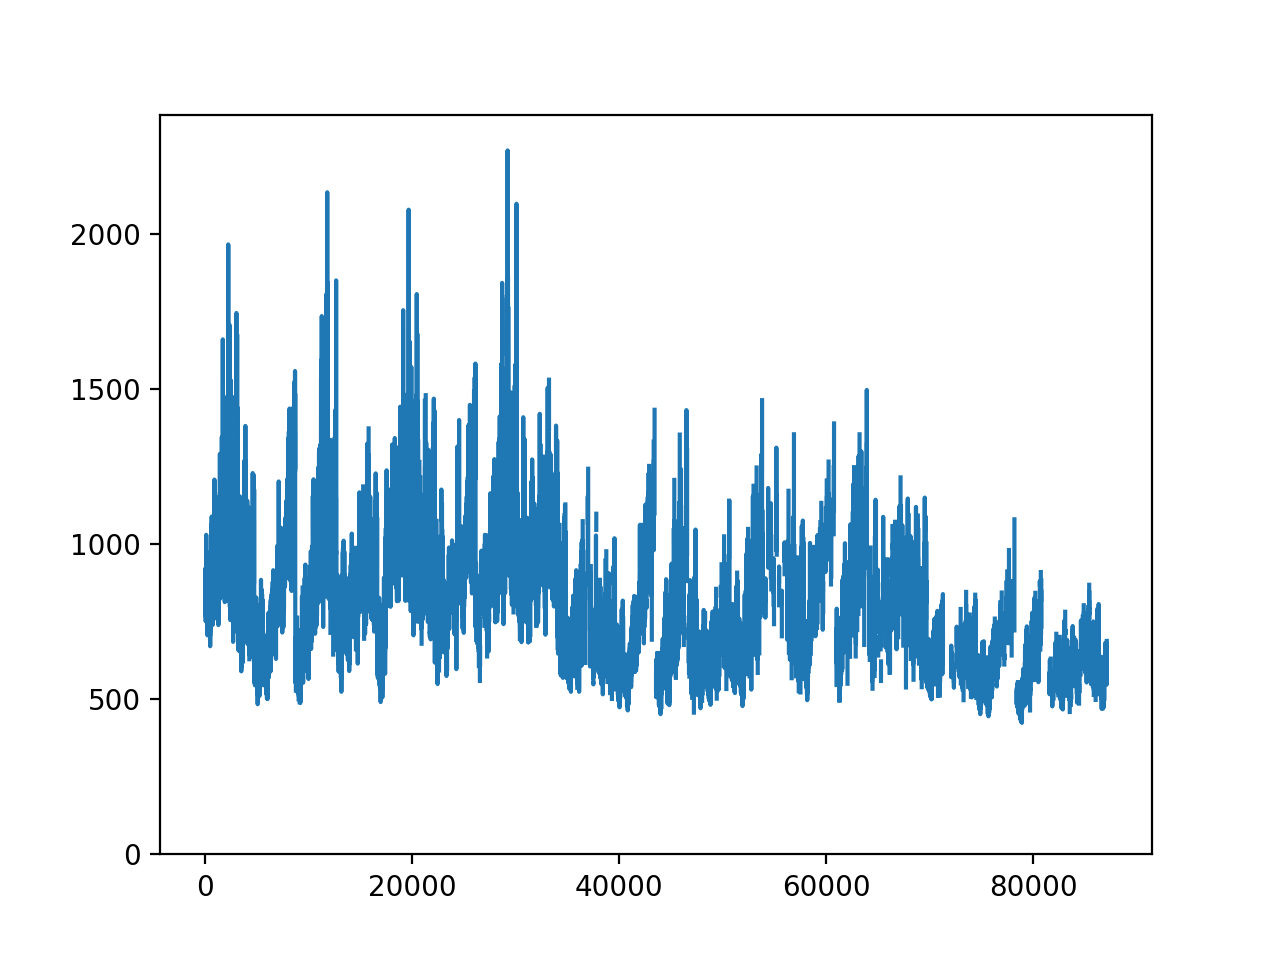

In [174]:
plt.figure()
plt.bar(costs['Periods'].unique(), [costs['TotalHousingCosts_1'][costs['Periods'] == year].mean() for year in costs['Periods'].unique()])
plt.show()

<AxesSubplot:>